# Student Performances Indicator

## Life cycle of Machine Learning Indicator

    understanding the problem statement
    Data Collection
    Data checks to perform
    EDA
    Data pre-processing 
    model training 
    choose best model

    


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.shape

(1000, 8)

# Data checks to perform

    # check missing values

    # check duplicates

    # check datatype 

    # check the number of uniques values of each column

    # check stattictics of dataset

    # check various categories present in the different categorical colunm


In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## observation --> there is no missing value present in the dataset.

In [8]:
df.duplicated().sum()

0

## observation --> there is no duplicates present in the dataset.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## check the number of uniques values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## insights:-

    --> from above description of numerical data ,all means are very close to each other --between 66 and 68.05

    --> all standard deviations are also close - between 14.6 and 15.19

    --> while there is minimum score 0 for math ,for writing  minimum is much higher =10 and for reading ,higher =17

# exploring data 


In [12]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [13]:
print("categories in gender variable: ", end=" ")
print(df['gender'].unique())

print("categories in race/ethinicity variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("categories in parental_level_of_education variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("categories in lunch variable: ", end=" ")
print(df['lunch'].unique())

print("categories in gender variable: ", end=" ")
print(df['gender'].unique())

print("categories in test_preparation_course variable: ", end=" ")
print(df['test_preparation_course'].unique())

categories in gender variable:  ['female' 'male']
categories in race/ethinicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable:  ['standard' 'free/reduced']
categories in gender variable:  ['female' 'male']
categories in test_preparation_course variable:  ['none' 'completed']


In [14]:
# define numerical and categorical features 
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']


In [15]:
numeric_features

['math_score', 'reading_score', 'writing_score']

In [16]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

# adding columns for total score and average :-

In [17]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full=df[df['reading_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
print(reading_full)
print(math_full)
print(writing_full)

17
7
14


In [19]:
reading_less_20=df[df['reading_score']<=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()
writing_less_20=df[df['writing_score']<=20]['average'].count()
print(reading_less_20)
print(math_less_20)
print(writing_less_20)

1
4
3


## insights :-
--> from above values we get students have performed the worst in maths 

--> best performances in reading section

# exploring data (visualization)

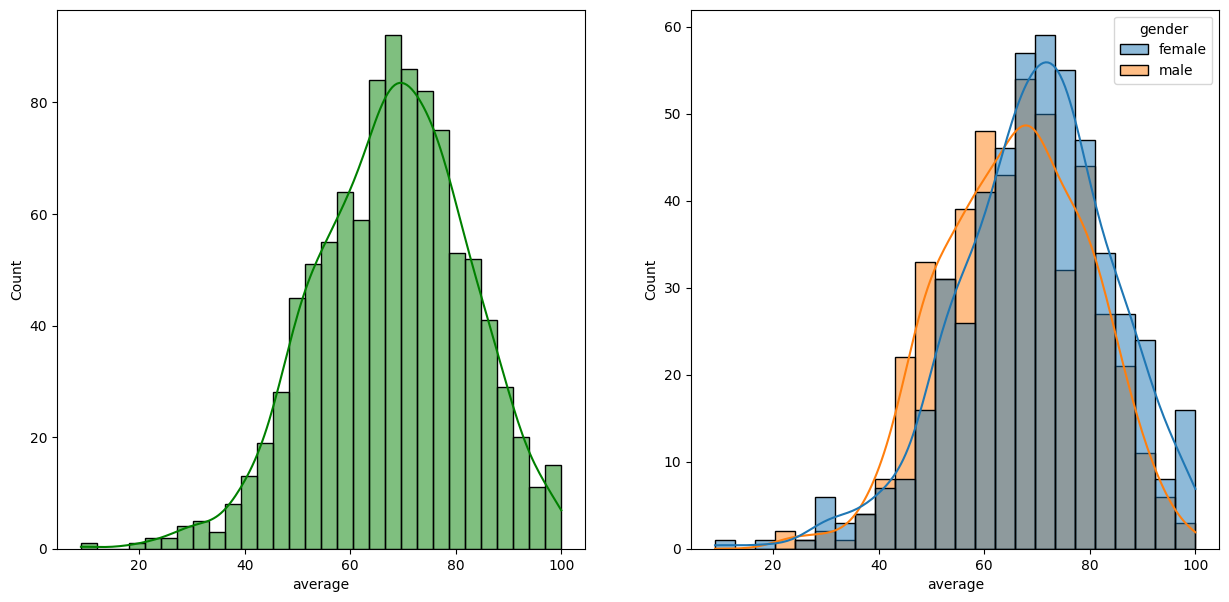

In [20]:
fig,axe=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

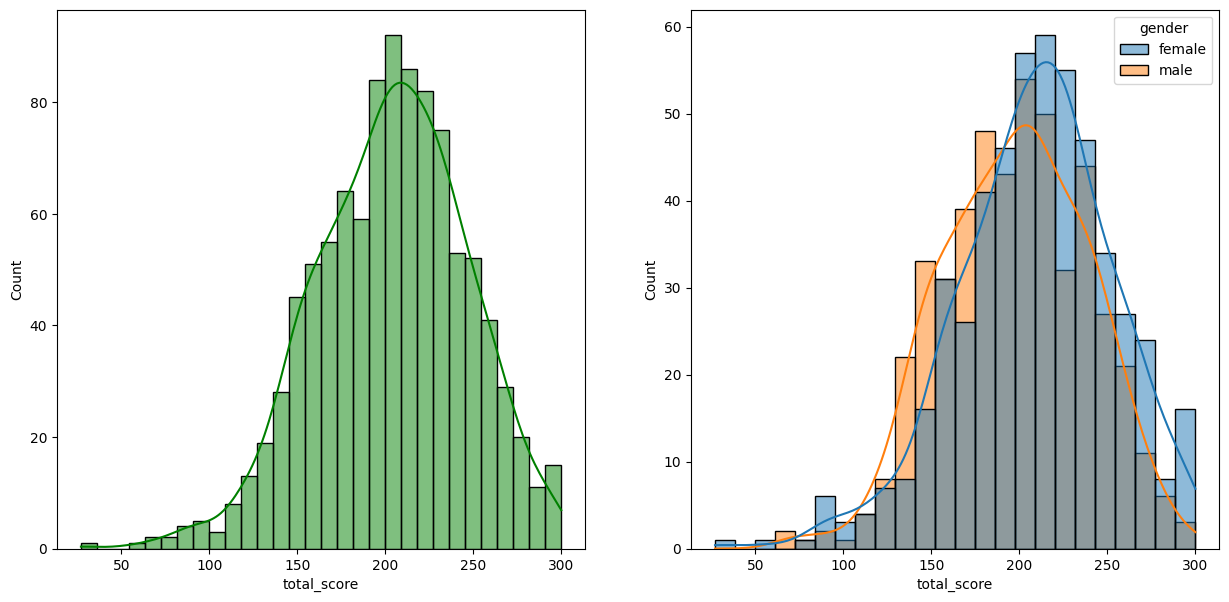

In [21]:
fig,axe=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

# insights

female students perform well as compared to the male students

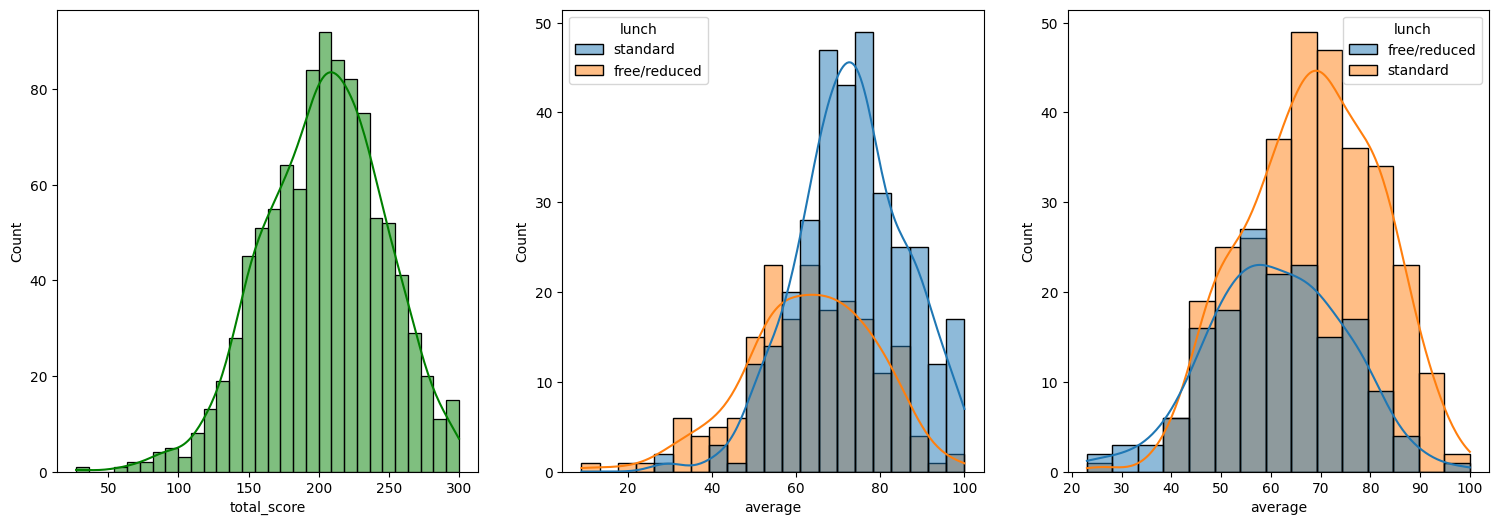

In [22]:
fig,axe=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

# insights
standard lunch helps perform well in exams wheather it is female or male students

